In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


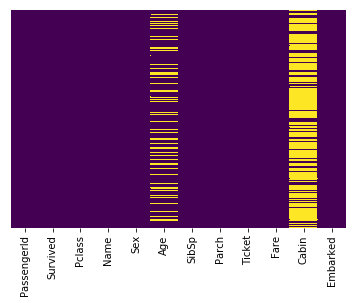

In [21]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [22]:
sns.set_style('whitegrid')

### PassengerId is just like index. Dont need it 
### Also, Cabin is just a lot of empty rows. Removing it

train.drop('PassengerId',axis=1,inplace=True)

In [36]:
train.drop('Cabin',axis=1,inplace=True)

In [26]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Checking the response variable distribution against Sex

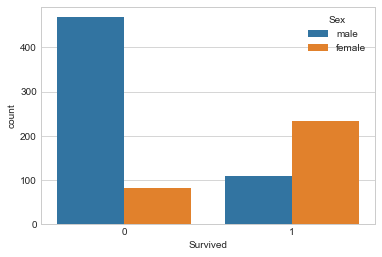

In [28]:
sns.countplot(x= 'Survived',data=train,hue='Sex')

### Survived - Class wise

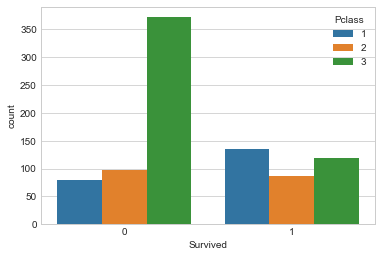

In [29]:
sns.countplot('Survived',data=train,hue='Pclass')

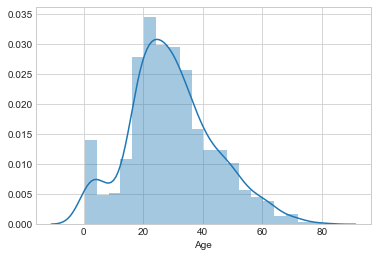

In [31]:
sns.distplot(train['Age'].dropna())

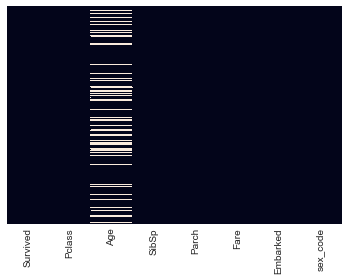

In [57]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

## Welthier passengers in the first class

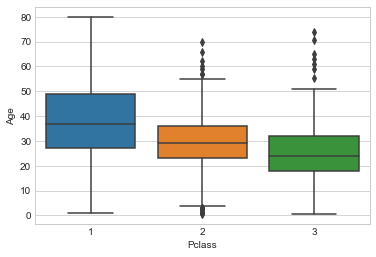

In [39]:
# train['Age']
sns.boxplot(x='Pclass',y='Age',data=train)

In [40]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


train.drop('Name',inplace=True,axis=1)

### Encoding sex, and then dropping original column

In [42]:
sex_codes = {'male':1,'female':0}

train['sex_code'] = train['Sex'].apply(lambda x: sex_codes[x])

In [44]:
train[['Sex','sex_code']].head()

,Sex,sex_code
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


train.drop('Sex',inplace=True,axis=1)

In [62]:
# train['Embarked'].isnull().value_counts()
train['Embarked'].value_counts()
# train['Embarked'].dropna(inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
embarked_codes = {'S':0,'C':1,'Q':2}

train['embarked'] = train['Embarked'].apply(lambda x: embarked_codes[x])

train.drop('Ticket',inplace=True,axis=1)

In [64]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,sex_code,embarked
0,0,3,22.0,1,0,7.2500,S,1,0.0
1,1,1,38.0,1,0,71.2833,C,0,1.0
2,1,3,26.0,0,0,7.9250,S,0,0.0
3,1,1,35.0,1,0,53.1000,S,0,0.0
4,0,3,35.0,0,0,8.0500,S,1,0.0


In [65]:
train.drop('Embarked',inplace=True,axis=1)

In [66]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_code,embarked
0,0,3,22.0,1,0,7.2500,1,0.0
1,1,1,38.0,1,0,71.2833,0,1.0
2,1,3,26.0,0,0,7.9250,0,0.0
3,1,1,35.0,1,0,53.1000,0,0.0
4,0,3,35.0,0,0,8.0500,1,0.0


### **Smartly imputing the age as per cabin class

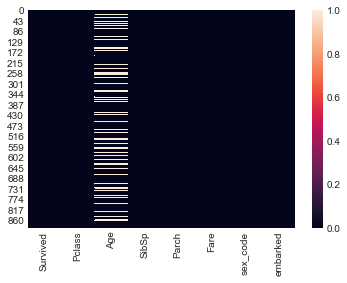

In [72]:
sns.heatmap(train.isnull())

In [69]:
group_class = train.groupby('Pclass')

In [70]:
group_class['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [71]:
class_age = {1 : 38.233441, 2: 29.877630 , 3: 25.140620}

In [74]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        return class_age[Pclass]
    else:
        return age

In [75]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

### We see that the nulls have been removed from the age

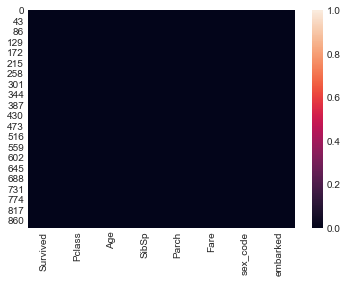

In [76]:
sns.heatmap(train.isnull())

### We see that PClass is a categorical variable. Creating Dummy variable for it. But after modeling, to see the effect of not doing it

# Now all set to start the logistic regression model

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split

In [79]:
test = pd.read_csv('titanic_test.csv')

In [80]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [81]:
test.drop(['PassengerId','Name','Cabin','Ticket'],inplace=True,axis=1)

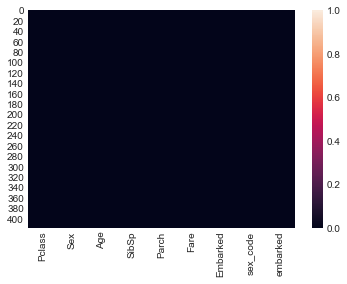

In [91]:
sns.heatmap(test.isnull())

In [83]:
test['Age']= test[['Age','Pclass']].apply(impute_age,axis=1)

In [86]:
test['Fare'].dropna(inplace=True)
`

In [89]:
test['sex_code'] = test['Sex'].apply(lambda x: sex_codes[x])

In [90]:
test['embarked'] = test['Embarked'].apply(lambda x: embarked_codes[x])

test.drop(['Sex','Embarked'],inplace=True,axis=1)

In [93]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,sex_code,embarked
0,3,34.5,0,0,7.8292,1,2
1,3,47.0,1,0,7.0000,0,0
2,2,62.0,0,0,9.6875,1,2
3,3,27.0,0,0,8.6625,1,0
4,3,22.0,1,1,12.2875,0,0
